In [1]:
import os
os.chdir("../")
%pwd

'c:\\Users\\PC\\Documents\\projects\\Power_Consumption_In_Tetouan'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [81]:
df=pd.read_csv('./artifacts/data_ingestion/powerconsumption.csv')

In [82]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [9]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [12]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

Datetime

In [29]:
df.Datetime = pd.to_datetime(df.Datetime)
print(f'The datatype for Datetime is: {df.Datetime.dtype}.\n')

df['month'] = df.Datetime.dt.month
df['weekday'] = df.Datetime.dt.day
df['time'] = df.Datetime.dt.time.astype(str)

The datatype for Datetime is: datetime64[ns].



In [31]:
df.head(3)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,month,weekday,time
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,00:00:00
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1,00:10:00
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,1,00:20:00


Exploring distributions of selected features

In [16]:
# User defined histogram plot function
def hist_plot(data, x_arg, title, x_label, y_label, bin_size, kde):
    """
    A univariate plot function that creates the histogram visualization of a feature in a dataframe using seaborn.
    
    Parameters:
        data (dataframe): The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        y_label: y_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        bin_size (int): user defined bin_size. Use None for default bin_size.
        kde (bool): Includes the kernel density. Value is either True or False.
    """
    sns.histplot(data = data, x = x_arg, bins = bin_size, kde = kde)
    plt.axvline(data[x_arg].mean(), color = 'red', linestyle = '-', linewidth = 2,
                label = 'Mean')
    plt.axvline(data[x_arg].median(), color = 'cyan', linestyle = ':', linewidth = 2,
                label = 'Median')
    plt.title(title, size = 15, weight = 'bold')
    plt.xlabel(x_label, size = 15, weight = 'bold')
    plt.ylabel(y_label, size = 15, weight = 'bold')
    plt.legend()

# User defined univariate plot function    
def box_plot(data, x_arg, title, x_label):
    """
    A univariate plot function that creates the boxplot of selected feature using seaborn.
    
    Parameters:
        data: The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
    """
    sns.boxplot(data = data, x = x_arg)
    plt.title(title, size = 15, weight = 'bold')
    plt.xlabel(x_label, size = 15, weight = 'bold')

# User defined scatter plot function    
def scatter_plot(data, x_arg, y_arg, title, x_label, y_label):
    """
    A plot function that creates a scatter plot of selected features
    
    Parameters:
        data: The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        y_label: y_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
    """
    sns.scatterplot(data = data, x = x_arg, y = y_arg)
    plt.title(title, size = 12, weight = 'bold')
    plt.xlabel(x_label, size = 12, weight = 'bold')
    plt.ylabel(y_label, size = 12, weight = 'bold')

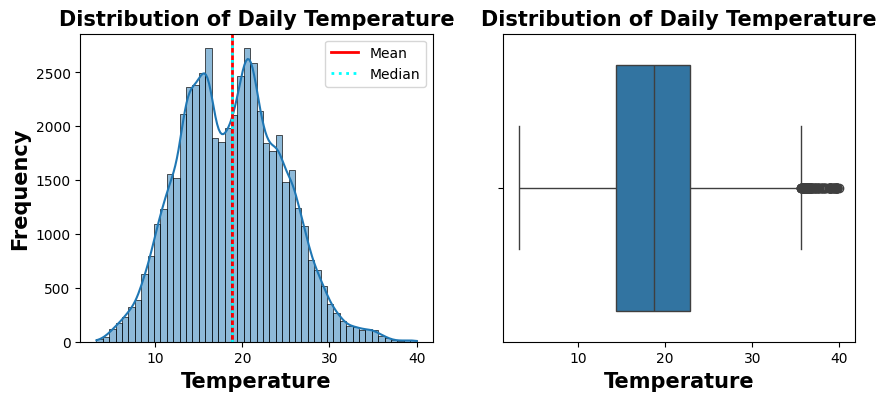

In [18]:
# Temperature distribution
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'Temperature', 'Distribution of Daily Temperature', 'Temperature', 'Frequency', 50, True)

plt.subplot(1, 2, 2)
box_plot(df,'Temperature', 'Distribution of Daily Temperature', 'Temperature')

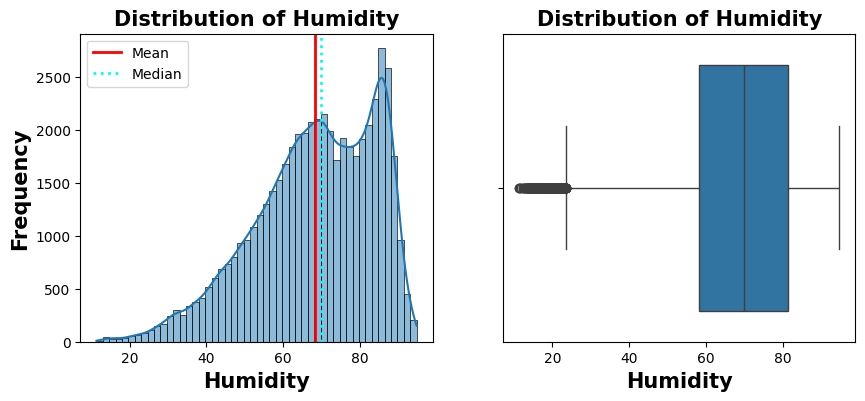

In [20]:
# Humidity distribution
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'Humidity', 'Distribution of Humidity', 'Humidity', 'Frequency', 50, True)

plt.subplot(1, 2, 2)
box_plot(df,'Humidity', 'Distribution of Humidity', 'Humidity')

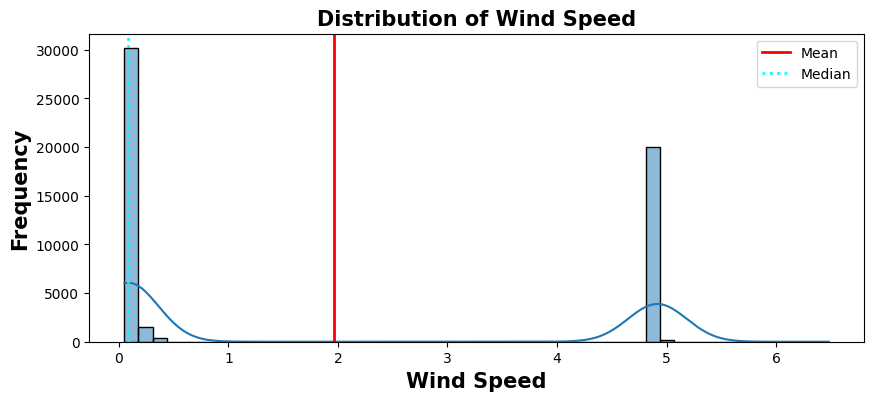

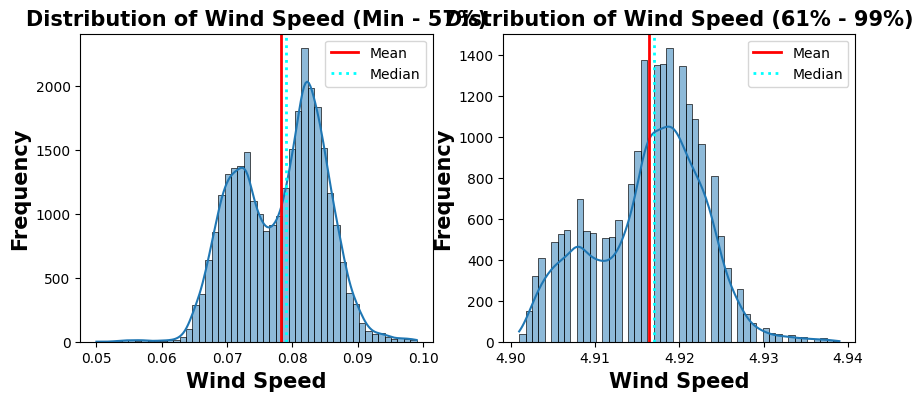

In [24]:
# Wind speed distribution
plt.figure(figsize = [10, 4])
hist_plot(df, 'WindSpeed', 'Distribution of Wind Speed', 'Wind Speed', 'Frequency', 50, True)

# Removing outlier values from wind speed
# Minimum value to 57%
lower_bound = df['WindSpeed'].quantile(0)
upper_bound = df['WindSpeed'].quantile(0.57)
mask_speed = df['WindSpeed'].between(lower_bound, upper_bound)
data_speed = df[mask_speed]

plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(data_speed, 'WindSpeed', 'Distribution of Wind Speed (Min - 57%)', 'Wind Speed', 'Frequency', 50, True)

# 61% to 99%
lower_bound = df['WindSpeed'].quantile(0.615)
upper_bound = df['WindSpeed'].quantile(0.997)
mask_speed = df['WindSpeed'].between(lower_bound, upper_bound)
data_speed = df[mask_speed]

plt.subplot(1, 2, 2)
hist_plot(data_speed, 'WindSpeed', 'Distribution of Wind Speed (61% - 99%)', 'Wind Speed', 'Frequency', 50, True)

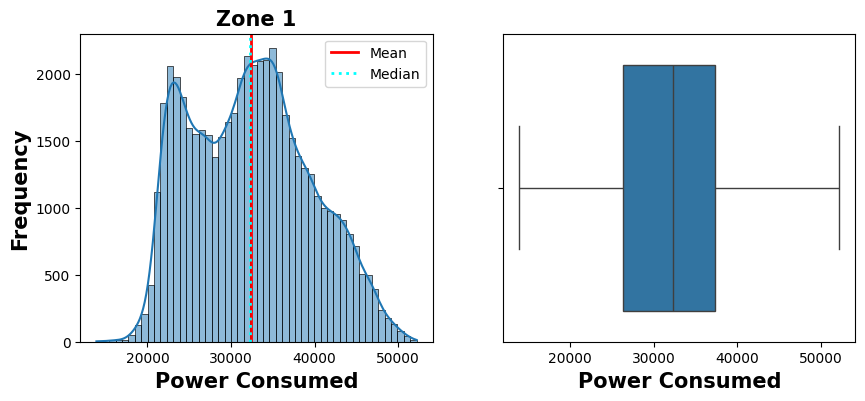

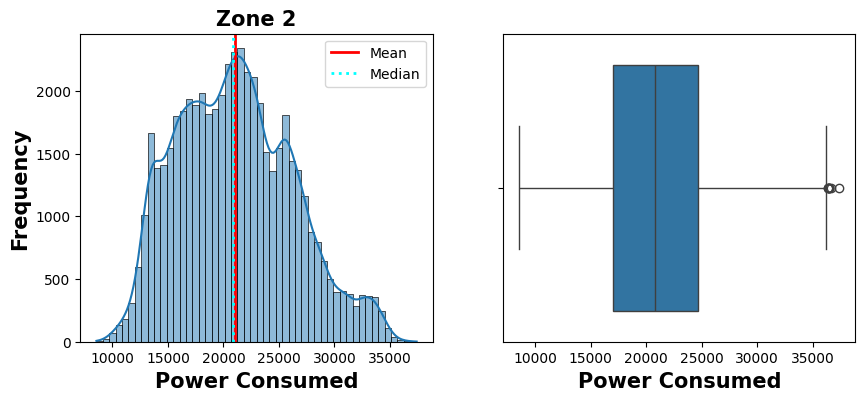

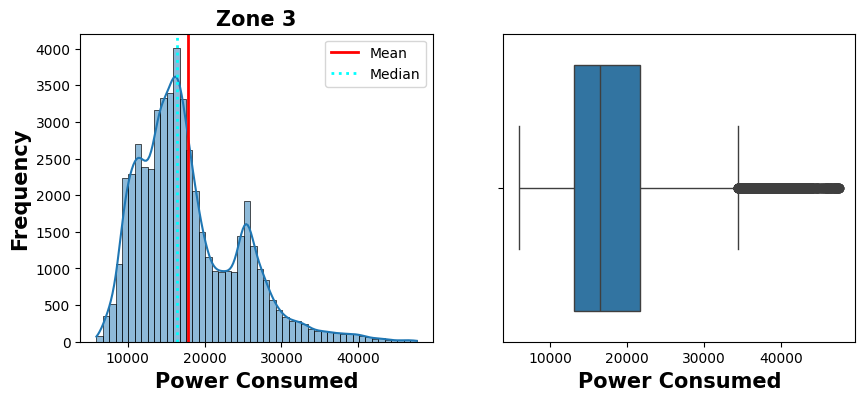

In [26]:
# Distribution of Power consumption in Zones 1, 2 and 3
#Zone 1
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'PowerConsumption_Zone1', 'Zone 1', 'Power Consumed', 'Frequency', 50, True)
plt.subplot(1, 2, 2)
box_plot(df,'PowerConsumption_Zone1', '', 'Power Consumed')

#Zone 2
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'PowerConsumption_Zone2', 'Zone 2', 'Power Consumed', 'Frequency', 50, True)
plt.subplot(1, 2, 2)
box_plot(df,'PowerConsumption_Zone2', '', 'Power Consumed')

# Zone 3
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'PowerConsumption_Zone3', 'Zone 3', 'Power Consumed', 'Frequency', 50, True)
plt.subplot(1, 2, 2)
box_plot(df,'PowerConsumption_Zone3', '', 'Power Consumed')

Relationship between Zonal Power Consumption and selected features


In [32]:
df.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'month', 'weekday',
       'time'],
      dtype='object')

Zone 1 correlation values


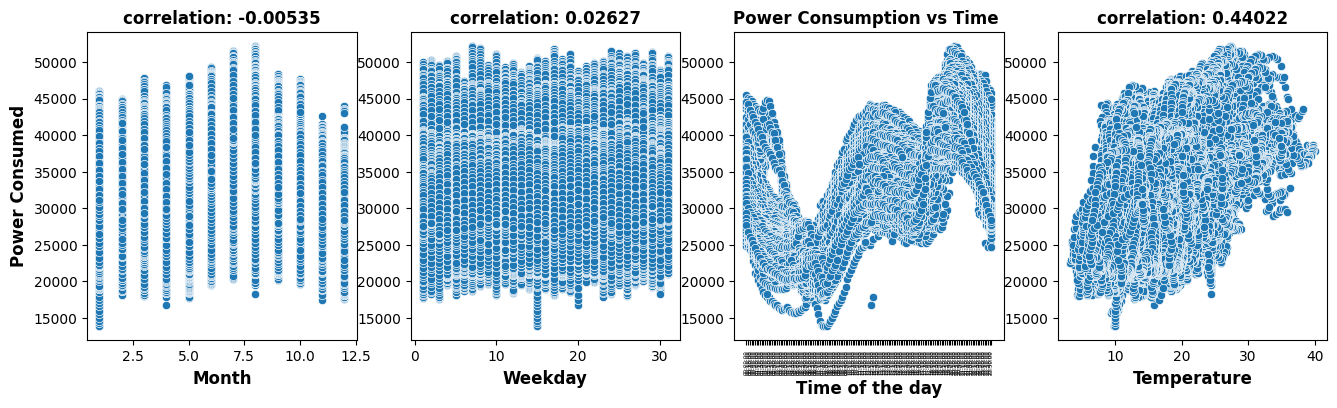

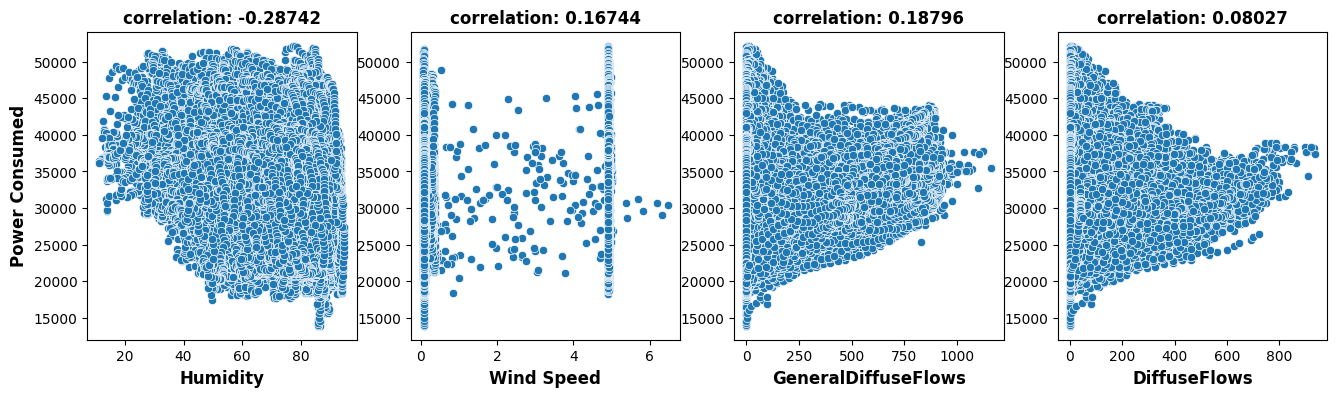

Zone 2 correlation values


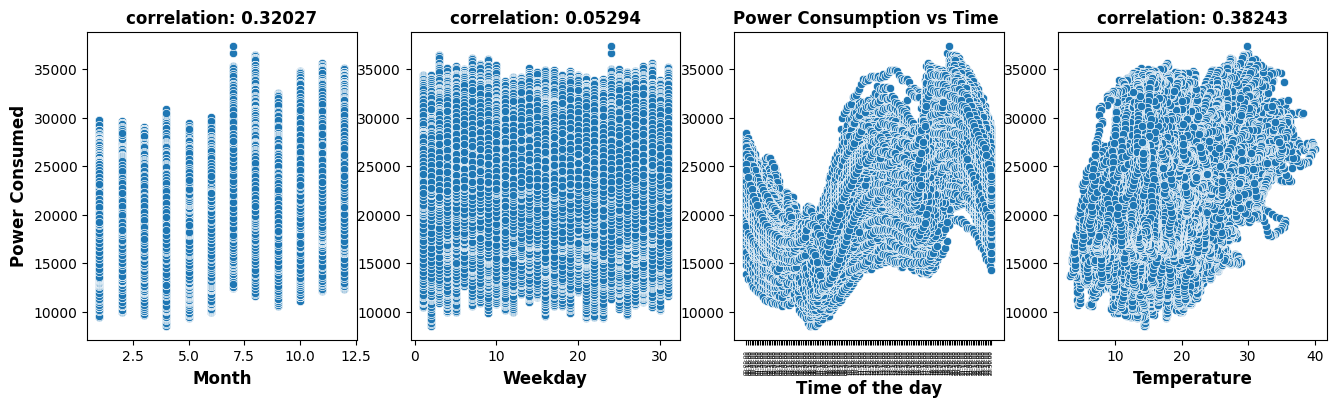

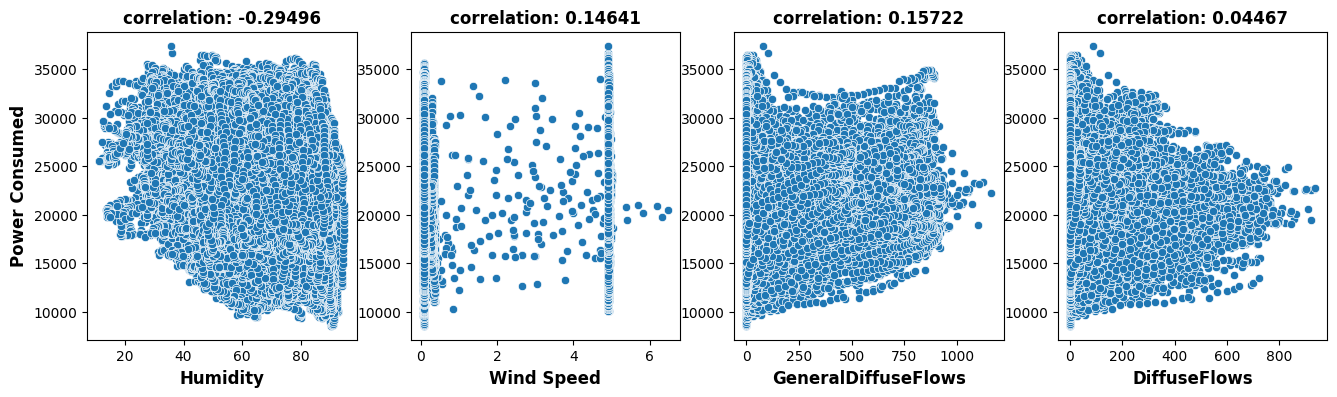

Zone 3 correlation values


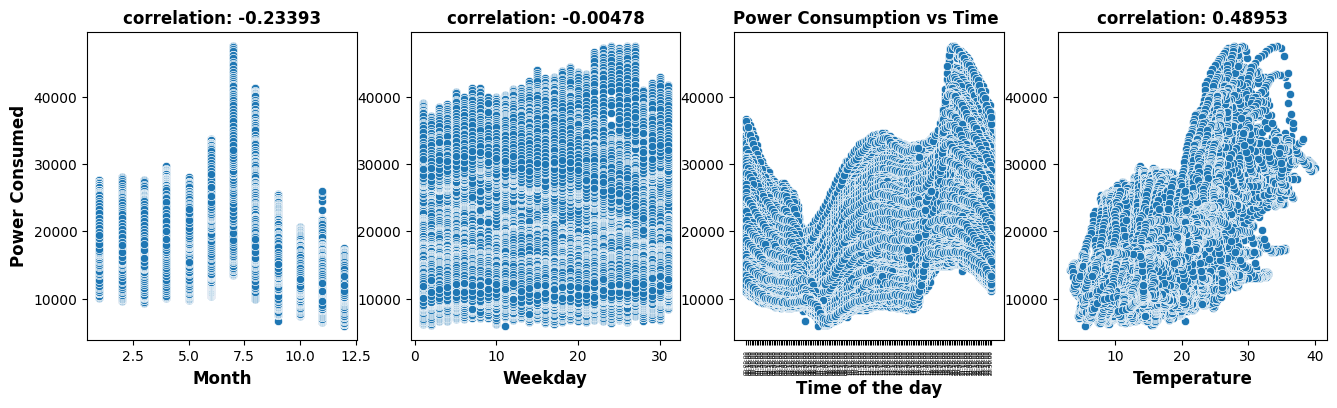

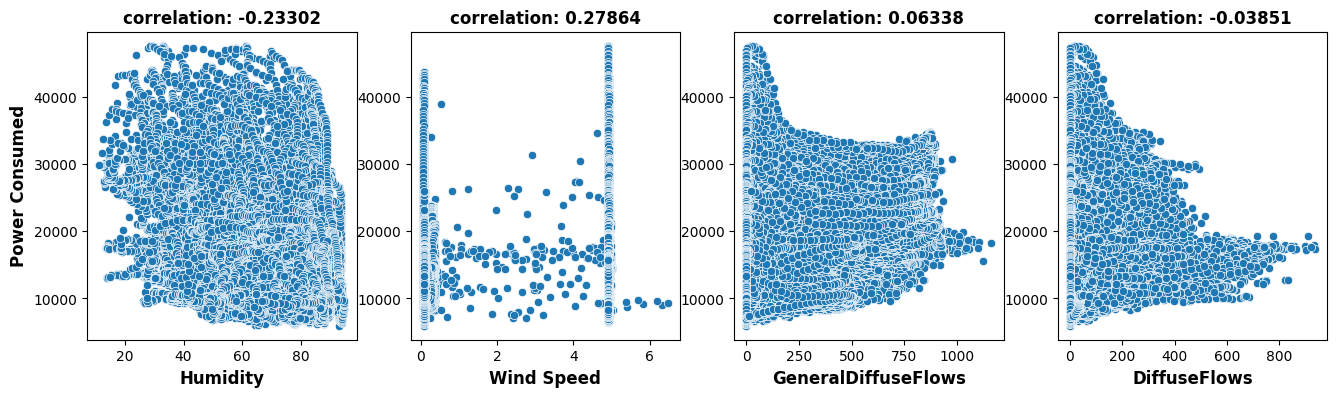

In [33]:
for num in range(1, 4):
    # Month
    print(f'Zone {num} correlation values')
    plt.figure(figsize = [16, 4])
    plt.subplot(1, 4, 1)
    scatter_plot(df, 'month', f'PowerConsumption_Zone{num}',
                 f"correlation: {df[f'PowerConsumption_Zone{num}'].corr(df['month']).round(5)}",
                 'Month', 'Power Consumed')
    # Weekday
    plt.subplot(1, 4, 2)
    scatter_plot(df, 'weekday', f'PowerConsumption_Zone{num}',
                 f"correlation: {df[f'PowerConsumption_Zone{num}'].corr(df['weekday']).round(5)}",
                 'Weekday', '')

    # Time
    plt.subplot(1, 4, 3)
    scatter_plot(df, 'time', f'PowerConsumption_Zone{num}', f"Power Consumption vs Time ",'Time of the day', '')
    plt.xticks(size = 4, rotation = 90)

    # Temperature
    plt.subplot(1, 4, 4)
    scatter_plot(df, 'Temperature', f'PowerConsumption_Zone{num}',
                 f"correlation: {df[f'PowerConsumption_Zone{num}'].corr(df['Temperature']).round(5)}",
                 'Temperature', '')

    # Humidity
    plt.figure(figsize = [16, 4])
    plt.subplot(1, 4, 1)
    scatter_plot(df, 'Humidity', f'PowerConsumption_Zone{num}',
                 f"correlation: {df[f'PowerConsumption_Zone{num}'].corr(df['Humidity']).round(5)}",
                 'Humidity', 'Power Consumed')
    # Wind Speed
    plt.subplot(1, 4, 2)
    scatter_plot(df, 'WindSpeed', f'PowerConsumption_Zone{num}',
                 f"correlation: {df[f'PowerConsumption_Zone{num}'].corr(df['WindSpeed']).round(5)}",
                 'Wind Speed', '')

    # General diffuse flows
    plt.subplot(1, 4, 3)
    scatter_plot(df, 'GeneralDiffuseFlows', f'PowerConsumption_Zone{num}',
                 f"correlation: {df[f'PowerConsumption_Zone{num}'].corr(df['GeneralDiffuseFlows']).round(5)}",
                 'GeneralDiffuseFlows', '')

    # Diffuse flows
    plt.subplot(1, 4, 4)
    scatter_plot(df, 'DiffuseFlows', f'PowerConsumption_Zone{num}',
                 f"correlation: {df[f'PowerConsumption_Zone{num}'].corr(df['DiffuseFlows']).round(5)}",
                 'DiffuseFlows', '')
    plt.show()

CODE FOR TESTING FEATURES


In [34]:
df.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'month', 'weekday',
       'time'],
      dtype='object')

In [43]:
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows','month', 'weekday','time']

In [83]:
df.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [44]:
df[features].values

array([[6.559, 73.8, 0.083, ..., 1, 1, '00:00:00'],
       [6.414, 74.5, 0.083, ..., 1, 1, '00:10:00'],
       [6.313, 74.5, 0.08, ..., 1, 1, '00:20:00'],
       ...,
       [6.9, 72.8, 0.086, ..., 12, 30, '23:30:00'],
       [6.758, 73.0, 0.08, ..., 12, 30, '23:40:00'],
       [6.58, 74.1, 0.081, ..., 12, 30, '23:50:00']], dtype=object)

In [41]:
data=df.iloc[:,1:]

In [45]:
data_features =data[features]

In [46]:
data_features

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,month,weekday,time
0,6.559,73.8,0.083,0.051,0.119,1,1,00:00:00
1,6.414,74.5,0.083,0.070,0.085,1,1,00:10:00
2,6.313,74.5,0.080,0.062,0.100,1,1,00:20:00
3,6.121,75.0,0.083,0.091,0.096,1,1,00:30:00
4,5.921,75.7,0.081,0.048,0.085,1,1,00:40:00
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,12,30,23:10:00
52412,6.947,72.6,0.082,0.051,0.093,12,30,23:20:00
52413,6.900,72.8,0.086,0.084,0.074,12,30,23:30:00
52414,6.758,73.0,0.080,0.066,0.089,12,30,23:40:00


In [64]:
df=data_features.copy()

In [65]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [66]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,month,weekday,time
0,6.559,73.8,0.083,0.051,0.119,1,1,00:00:00
1,6.414,74.5,0.083,0.070,0.085,1,1,00:10:00
2,6.313,74.5,0.080,0.062,0.100,1,1,00:20:00
3,6.121,75.0,0.083,0.091,0.096,1,1,00:30:00
4,5.921,75.7,0.081,0.048,0.085,1,1,00:40:00
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,12,30,23:10:00
52412,6.947,72.6,0.082,0.051,0.093,12,30,23:20:00
52413,6.900,72.8,0.086,0.084,0.074,12,30,23:30:00
52414,6.758,73.0,0.080,0.066,0.089,12,30,23:40:00


In [67]:
# Separate features to be scaled and encoded
numerical_features = df.drop(columns=['time']).columns
time_feature = ['time']



In [68]:
numerical_features

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'month', 'weekday'],
      dtype='object')

In [69]:
time_feature

['time']

In [70]:
# Initialize the scaler
scaler = MinMaxScaler()

# Scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])



In [71]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,month,weekday,time
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.0,0.000000,00:00:00
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.0,0.000000,00:10:00
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.0,0.000000,00:20:00
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.0,0.000000,00:30:00
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.0,0.000000,00:40:00
...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091,1.0,0.966667,23:10:00
52412,0.100645,0.734004,0.004974,0.000040,0.000088,1.0,0.966667,23:20:00
52413,0.099366,0.736401,0.005596,0.000069,0.000067,1.0,0.966667,23:30:00
52414,0.095504,0.738797,0.004663,0.000053,0.000083,1.0,0.966667,23:40:00


In [74]:
# Initialize the encoder
encoder = OneHotEncoder(handle_unknown="ignore")

# OneHot encode the 'time' feature
time_encoded = encoder.fit_transform(df[time_feature])

In [75]:
time_encoded

<52416x144 sparse matrix of type '<class 'numpy.float64'>'
	with 52416 stored elements in Compressed Sparse Row format>

In [76]:
time_encoded_df = pd.DataFrame(time_encoded.todense())

In [77]:
time_encoded_df

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
52412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
52414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:

# Convert the encoded values to a DataFrame
# time_encoded_df = pd.DataFrame(time_encoded, columns=encoder.get_feature_names_out(['time']))

In [78]:
# Concatenate the encoded time values with the scaled DataFrame
df = pd.concat([df, time_encoded_df], axis=1)

# Drop the original 'time' and 'time_seconds' columns
df = df.drop(columns=['time'])

       Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
0         0.090091  0.748382   0.005130             0.000040      0.000115   
1         0.086146  0.756770   0.005130             0.000057      0.000079   
2         0.083399  0.756770   0.004663             0.000050      0.000095   
3         0.078176  0.762761   0.005130             0.000075      0.000091   
4         0.072736  0.771148   0.004819             0.000038      0.000079   
...            ...       ...        ...                  ...           ...   
52411     0.102358  0.731608   0.004663             0.000031      0.000091   
52412     0.100645  0.734004   0.004974             0.000040      0.000088   
52413     0.099366  0.736401   0.005596             0.000069      0.000067   
52414     0.095504  0.738797   0.004663             0.000053      0.000083   
52415     0.090662  0.751977   0.004819             0.000050      0.000107   

       month   weekday    0    1    2  ...  134  135  136  137 

In [79]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,month,weekday,0,1,2,...,134,135,136,137,138,139,140,141,142,143
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.0,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091,1.0,0.966667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
52412,0.100645,0.734004,0.004974,0.000040,0.000088,1.0,0.966667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52413,0.099366,0.736401,0.005596,0.000069,0.000067,1.0,0.966667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
52414,0.095504,0.738797,0.004663,0.000053,0.000083,1.0,0.966667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
